In [42]:

import pandas as pd
import numpy as np
import random
from scipy.stats import loguniform, lognorm
from scipy import stats
import time
import math
from matplotlib import pyplot as plt

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns

In [44]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Load and format the data

In [45]:
import pandas as pd
import numpy as np

def npy2df(input_file, return_gene_info=False):
    """
    Load the npy file with X number of bursting parameter estimation for a given gene. 
    if return_gene_info is True : 
        return the df containing the estimation, the gene index number (starting from 1, not 0) and a gene array of some sort?
    else: return the dataframe with the parameter estimation as column and each estimation attemps as rows
        
    """
    gene_no, gene, result = np.load(input_file, allow_pickle='True')
    
    result_flatten = result.flatten()
    df = pd.DataFrame([x for x in result_flatten])
    
    if return_gene_info:
        return(df, gene_no, gene)
    else:
        return(df)

In [46]:
%ls ./plot_gtm_5000

gene_Atf4_biallelic.npy  gene_Atf4_cast.npy      gene_Fos_c57.npy
gene_Atf4_c57.npy        gene_Fos_biallelic.npy  gene_Fos_cast.npy


In [47]:
%pwd

'/home/anna/Documents/research_projects/transcriptional_bursting'

In [48]:
df = npy2df('./plot_gtm_5000/gene_Fos_cast.npy')
df

,kon,ron,koff,roff,mu,delta,dist
0,0.508070,2.911384,0.229948,1.550094,98.332855,1.0,0.161125
1,3.789533,2.757013,9.156942,6.001473,105.755990,1.0,0.381882
2,2.293811,2.051970,8.251702,13.680642,133.938262,1.0,0.104519
3,1.664319,1.563664,3.030914,2.589662,93.519916,1.0,0.272991
4,2.713646,2.299226,10.254631,14.663254,115.470849,1.0,0.148697
...,...,...,...,...,...,...,...
4995,2.410759,2.809262,3.733434,5.790621,83.241318,1.0,0.559233
4996,3.789533,2.757013,9.156942,6.001473,105.755990,1.0,0.381882
4997,8.518545,4.781045,6.730421,4.451945,101.614208,1.0,0.332581
4998,1.685127,1.595272,3.914186,5.843190,121.492206,1.0,0.257622


In [49]:
def BFandBS(df):
    """
    input is the dataframe containing the parameters as columns.
    need column named 'koff', 'roff', 'kon', 'ron' 
    
    compute burst frequency and burst size from the parameters
    """
    df['tau_off']= df['kon']/df['ron']
    df['tau_on'] = df['koff']/df['roff']
    df['bf'] = 1./(df['tau_on'] + df['tau_off'])
    df['bs'] = df['mu'] * df['tau_on']

In [50]:
BFandBS(df)
df

,kon,ron,koff,roff,mu,delta,dist,tau_off,tau_on,bf,bs
0,0.508070,2.911384,0.229948,1.550094,98.332855,1.0,0.161125,0.174511,0.148344,3.097357,14.587130
1,3.789533,2.757013,9.156942,6.001473,105.755990,1.0,0.381882,1.374507,1.525782,0.344793,161.360629
2,2.293811,2.051970,8.251702,13.680642,133.938262,1.0,0.104519,1.117858,0.603166,0.581049,80.787045
3,1.664319,1.563664,3.030914,2.589662,93.519916,1.0,0.272991,1.064371,1.170390,0.447475,109.454776
4,2.713646,2.299226,10.254631,14.663254,115.470849,1.0,0.148697,1.180243,0.699342,0.532032,80.753624
...,...,...,...,...,...,...,...,...,...,...,...
4995,2.410759,2.809262,3.733434,5.790621,83.241318,1.0,0.559233,0.858147,0.644738,0.665387,53.668843
4996,3.789533,2.757013,9.156942,6.001473,105.755990,1.0,0.381882,1.374507,1.525782,0.344793,161.360629
4997,8.518545,4.781045,6.730421,4.451945,101.614208,1.0,0.332581,1.781733,1.511793,0.303626,153.619690
4998,1.685127,1.595272,3.914186,5.843190,121.492206,1.0,0.257622,1.056326,0.669871,0.579308,81.384141


In [51]:
df['log_kon'] = [np.log10(x) for x in df['kon']]
df['log_koff'] = [np.log10(x) for x in df['koff']]

In [52]:
df['log_bs'] = [np.log10(x) for x in df['bs']]
df['log_bf'] = [np.log10(x) for x in df['bf']]

# Smooth kernel density 

Kernel density estimate KDE


In [53]:
from scipy.stats import gaussian_kde
def best_parameters(df, density_kernel_name=None, save_kde="density_kernel"):
    """
    return the index for the best parameters.
    
    if density_kernel_name is None , we recompute the gaussian kde and if save_kde is a str. 
    Save the kde in df using save_kde as column name
    """
    
    if density_kernel_name is None:
        # Calculate the point density
        xy = np.vstack([df['bs'],df['bf']])
        z = gaussian_kde(xy)(xy)
        if save_kde is not False:
            df[save_kde] = z
            
    else:
        z = df[density_kernel_name]
    
    return(np.where(z == np.amax(z))[0][0])

        

In [54]:
best_parameters(df)

564

In [55]:
df

,kon,ron,koff,roff,mu,delta,dist,tau_off,tau_on,bf,bs,log_kon,log_koff,log_bs,log_bf,density_kernel
0,0.508070,2.911384,0.229948,1.550094,98.332855,1.0,0.161125,0.174511,0.148344,3.097357,14.587130,-0.294077,-0.638371,1.163970,0.490991,0.000339
1,3.789533,2.757013,9.156942,6.001473,105.755990,1.0,0.381882,1.374507,1.525782,0.344793,161.360629,0.578586,0.961750,2.207798,-0.462441,0.031255
2,2.293811,2.051970,8.251702,13.680642,133.938262,1.0,0.104519,1.117858,0.603166,0.581049,80.787045,0.360558,0.916544,1.907342,-0.235787,0.035248
3,1.664319,1.563664,3.030914,2.589662,93.519916,1.0,0.272991,1.064371,1.170390,0.447475,109.454776,0.221237,0.481574,2.039235,-0.349231,0.033521
4,2.713646,2.299226,10.254631,14.663254,115.470849,1.0,0.148697,1.180243,0.699342,0.532032,80.753624,0.433553,1.010920,1.907162,-0.274062,0.032701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.410759,2.809262,3.733434,5.790621,83.241318,1.0,0.559233,0.858147,0.644738,0.665387,53.668843,0.382154,0.572108,1.729722,-0.176926,0.008827
4996,3.789533,2.757013,9.156942,6.001473,105.755990,1.0,0.381882,1.374507,1.525782,0.344793,161.360629,0.578586,0.961750,2.207798,-0.462441,0.031255
4997,8.518545,4.781045,6.730421,4.451945,101.614208,1.0,0.332581,1.781733,1.511793,0.303626,153.619690,0.930365,0.828042,2.186447,-0.517661,0.017960
4998,1.685127,1.595272,3.914186,5.843190,121.492206,1.0,0.257622,1.056326,0.669871,0.579308,81.384141,0.226633,0.592641,1.910540,-0.237090,0.035356


In [56]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.color_palette("viridis")

def plot_kde(df, bs, bf, kde="density_kernel",
             title=None, dot_size=4, colormap='viridis',
             best_param=True,
             linestype='-', color_line='grey',
             norm_scale=True,
             show=True,
             save=None):
    """
    

    --> put the line with best parameter as an option..
    
    --> later we need to create a wrapper function to give a adata objet + a gene name
    
    df
    bs
    df
    kde="density_kernel"
    title
    size
    colormap
    best_param
    linestype
    color_line
    norm_scale
    show
    save
    """
    
    # scatter plot
    if norm_scale:
        fig = sns.scatterplot(data=df, x=bf, y=bs,
                              hue=kde, size_norm=(0,1),
                              palette=colormap, s=dot_size)
    else:
        fig = sns.scatterplot(data=df, x=bf, y=bs,
                              hue=kde, hue_norm=(np.min(df['density_kernel']),
                                                 np.max(df['density_kernel'])),
                              palette=colormap, s=dot_size)
    
    if title is not None: 
        fig.set_title(title)
    
    #plt.legend(loc=legend_loc)
    plt.legend(bbox_to_anchor=(1.05, 1),
               loc='upper left',
               borderaxespad=0,
              title='kernel density')
    
    if best_param : 
    
        # Add the best parameter estimation based on the density kernel
        index_max_parameter = best_parameters(df, save_kde="density_kernel")
        xmax = df[bs][index_max_parameter]
        ymax = df[bf][index_max_parameter]
        fig.axvline(ymax, color="grey", linestyle="-.", linewidth=0.5) #linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
        fig.axhline(xmax, color="grey", linestyle="-.", linewidth=0.5)
    
    
    # plot / saving settings
    if save is not None:
        plt.savefig(save, bbox_inches='tight')
    if show :
        plt.show()

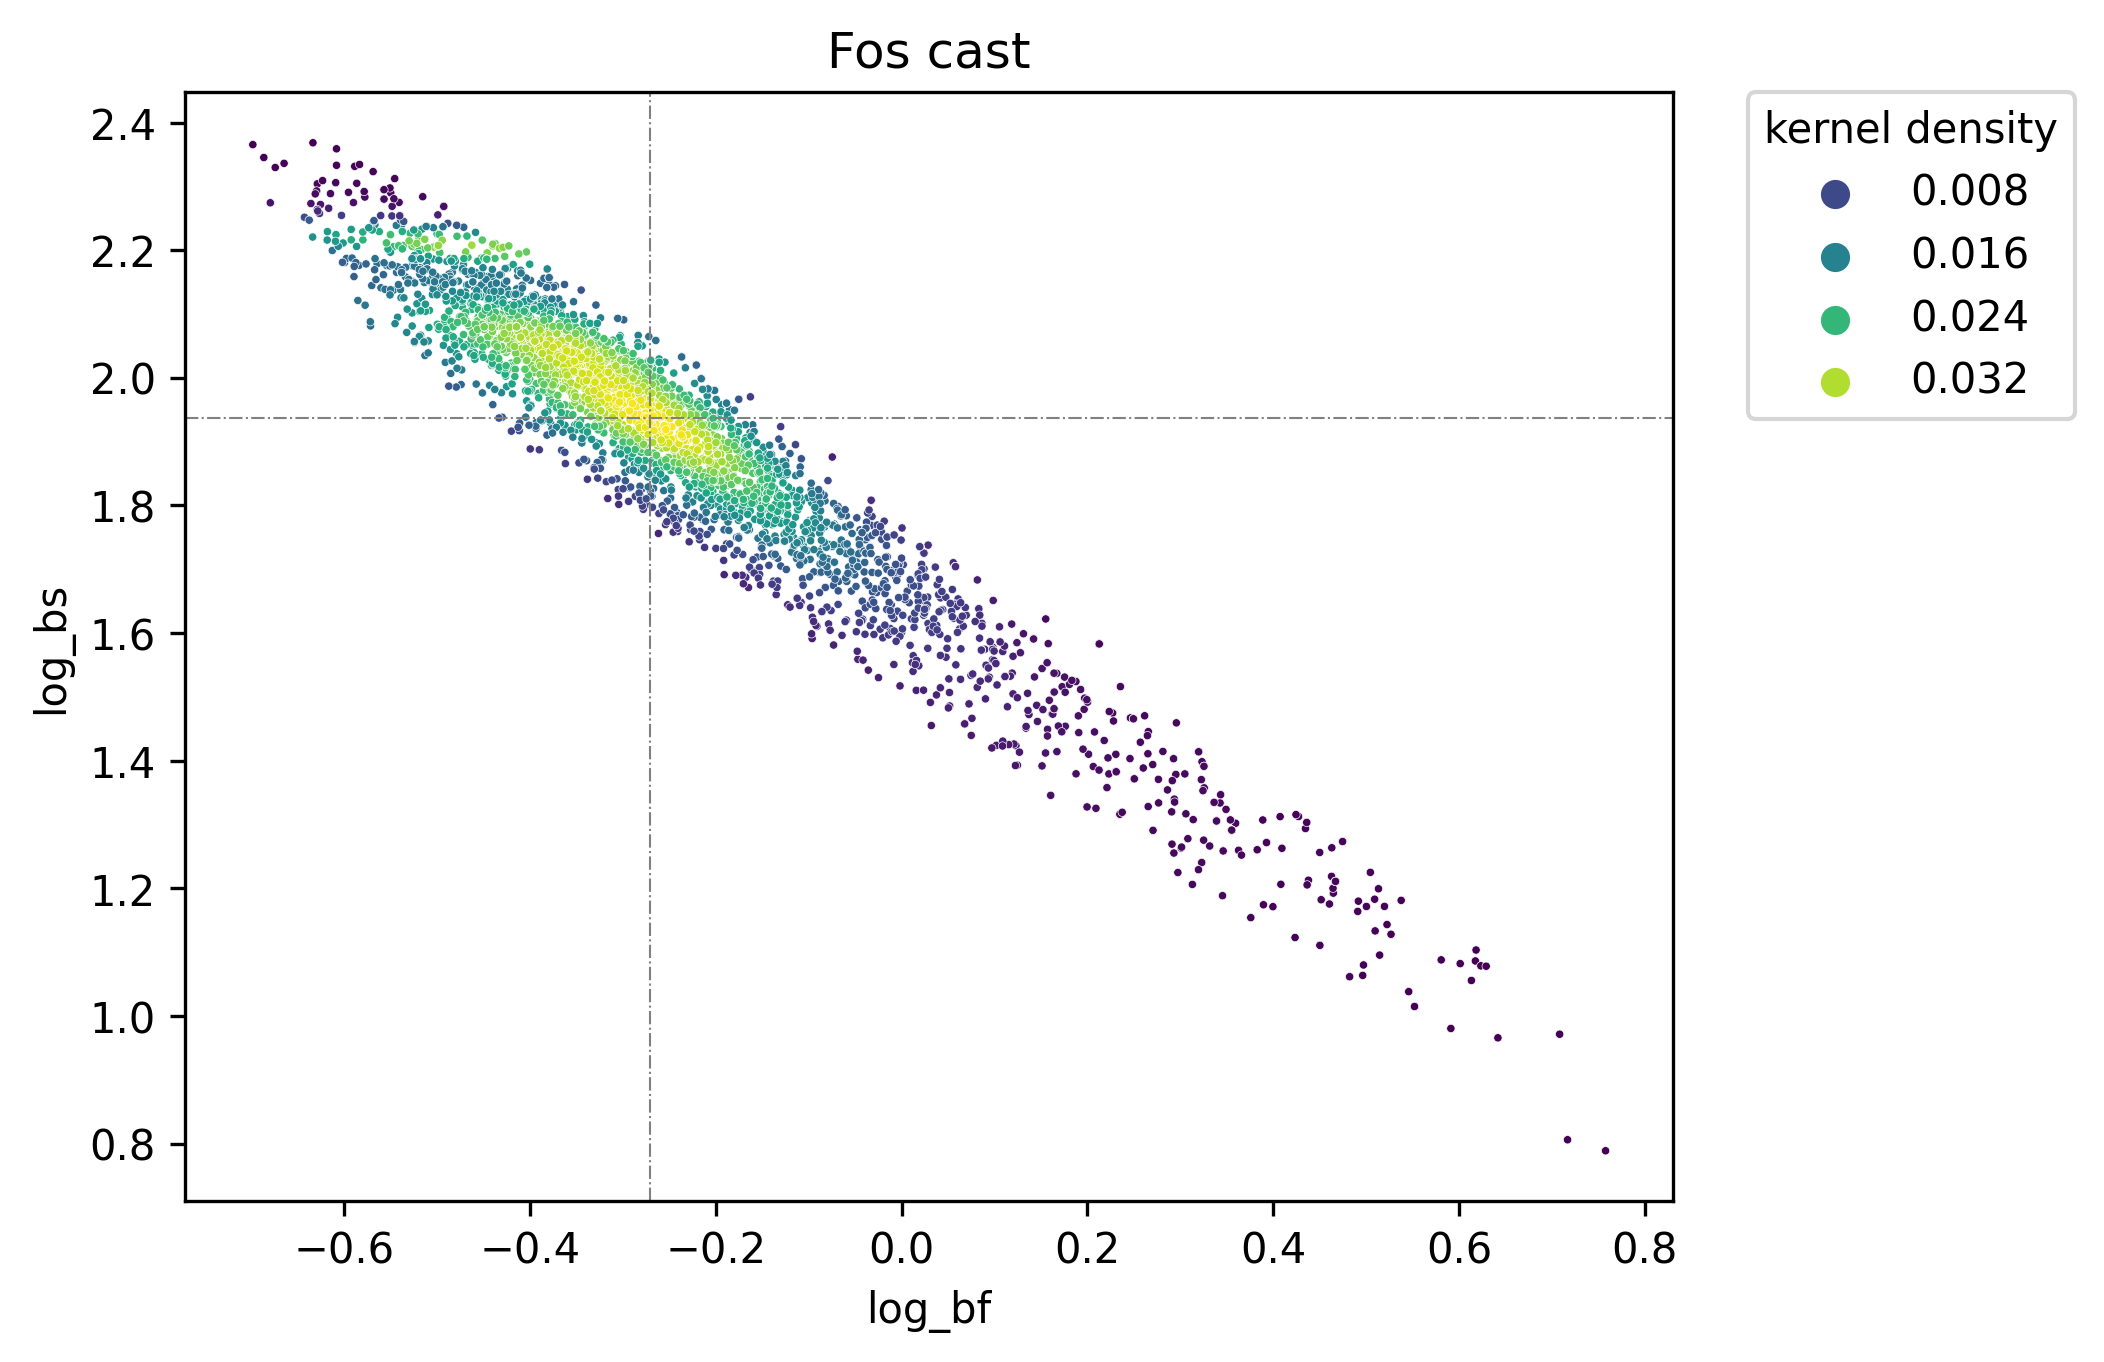

In [57]:
plot_kde(df, bs="log_bs", bf="log_bf", title="Fos cast", dot_size=4, save="Fos_cast_kde.png")